In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
data = pd.read_csv('train_final.csv')

In [7]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data = data.drop('Unnamed: 0',axis=1)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
d1 = data.drop(data.columns[[3,8]],axis=1)

In [19]:
data.columns[[0,1,2]]

Index(['PassengerId', 'Survived', 'Pclass'], dtype='object')

In [21]:
d1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
Y = np.array(d1.Survived)

In [28]:
X = np.array(d1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])

In [29]:
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ..., 
       [3, 'female', 30.0, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [43]:
d1.Embarked[d1.Embarked=='S'] = 1
d1.Embarked[d1.Embarked=='C'] = 2
d1.Embarked[d1.Embarked=='Q'] = 3
d1.Sex[d1.Sex=="male"]=1
d1.Sex[d1.Sex=="female"]=0

/home/avikpal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/avikpal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/avikpal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [44]:
d1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [45]:
X = np.array(d1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
X

array([[3, 1, 22.0, ..., 0, 7.25, 1],
       [1, 0, 38.0, ..., 0, 71.2833, 2],
       [3, 0, 26.0, ..., 0, 7.925, 1],
       ..., 
       [3, 0, 30.0, ..., 2, 23.45, 1],
       [1, 1, 26.0, ..., 0, 30.0, 2],
       [3, 1, 32.0, ..., 0, 7.75, 3]], dtype=object)

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=42,stratify=Y)

In [79]:
X_train.shape

(666, 7)

In [80]:
X_test.shape

(223, 7)

In [81]:
Y_train.shape

(666,)

In [82]:
Y_test.shape

(223,)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
classifier1 = LogisticRegression()

In [85]:
classifier1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
classifier1.intercept_

array([ 3.10207779])

In [87]:
classifier1.coef_

array([[-0.83035295, -2.43387176, -0.02670809, -0.23875731, -0.06707608,
         0.00595246,  0.38267697]])

In [88]:
prediction1 = classifier1.predict(X_test)

In [89]:
np.mean(prediction1==Y_test)

0.79372197309417036

In [90]:
np.mean(classifier1.predict(X_train)==Y_train)

0.80180180180180183

[0.70852017937219736, 0.68609865470852016, 0.65919282511210764, 0.66816143497757852, 0.65919282511210764, 0.66367713004484308, 0.66816143497757852, 0.66367713004484308, 0.66816143497757852, 0.67713004484304928, 0.66816143497757852, 0.68609865470852016, 0.6547085201793722, 0.68609865470852016, 0.67713004484304928, 0.68161434977578472, 0.66367713004484308, 0.67264573991031396, 0.66816143497757852, 0.67713004484304928, 0.6905829596412556, 0.69506726457399104, 0.64573991031390132, 0.66367713004484308, 0.63228699551569512, 0.67264573991031396, 0.63228699551569512, 0.66367713004484308, 0.64573991031390132, 0.67264573991031396, 0.6905829596412556, 0.68161434977578472, 0.68161434977578472, 0.68161434977578472, 0.67713004484304928, 0.68161434977578472, 0.67713004484304928, 0.67713004484304928, 0.68161434977578472, 0.66816143497757852, 0.67264573991031396, 0.66816143497757852, 0.66367713004484308, 0.67713004484304928, 0.67264573991031396, 0.65919282511210764, 0.67264573991031396, 0.6547085201793

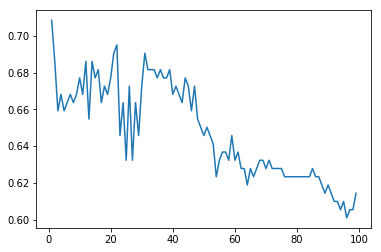

In [107]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,100)
scores = []
for k in k_values:
    classifier2 = KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(X_train,Y_train)
    scores.append(classifier2.score(X_test,Y_test))

print(scores)
plt.plot(k_values,scores)

In [108]:
classifier2 = KNeighborsClassifier(n_neighbors=1)

In [110]:
classifier2.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [111]:
prediction2 = classifier2.predict(X_test)

In [ ]:
###Received an accuracy of 75.11% on Kaggle